<a href="https://colab.research.google.com/github/Akanksha131313/Financial_Report_Analysis/blob/main/California_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HOUSE PRICE PREDICTION**

##**Import Libraries -**

In [1]:
#Generic Libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##**Load the dataset : 'House Price Prediction'**

In [2]:
# Dataset
from sklearn.datasets import fetch_california_housing

In [3]:
# Get the dataset -
df = fetch_california_housing()

In [4]:
type(df)

sklearn.utils._bunch.Bunch

In [5]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

##**Lets check the discription of the dataset-**

In [6]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print(df.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(df.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


##**Preparing the dataset -**

In [10]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [11]:
# convert raw data to pd df:
fch_df = pd.DataFrame(df.data, columns=df.feature_names)

In [12]:
# re-check : # Independent data - feature_names -> input features
fch_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
# dependent data -> output feature
fch_df['target'] = df.target

In [14]:
#re-check
fch_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
#rename the column for better understanding :
fch_df.rename(columns={'target':'Price'},inplace=True)
fch_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


##**Exploratory Data Analysis -**

In [41]:
fch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [42]:
#check the null values
fch_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [43]:
# Summarizing the stats of the data -
fch_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0.5, 1.0, 'Distribution of House Prices')

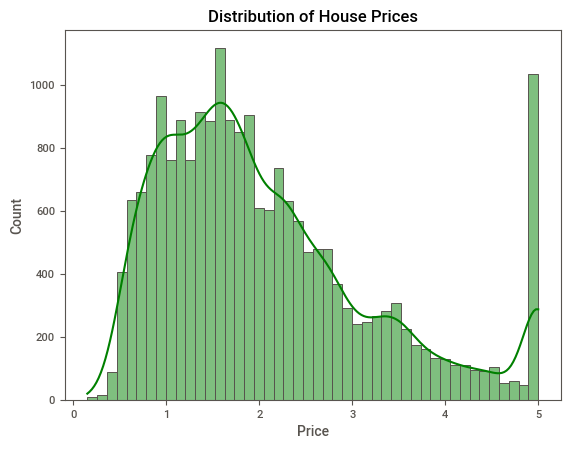

In [144]:
# Distribution Of Price
sns.histplot(fch_df['Price'], kde=True, color='green')
plt.title("Distribution of House Prices")

### Analysing the Correlated Features

In [44]:
# correlation :
fch_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


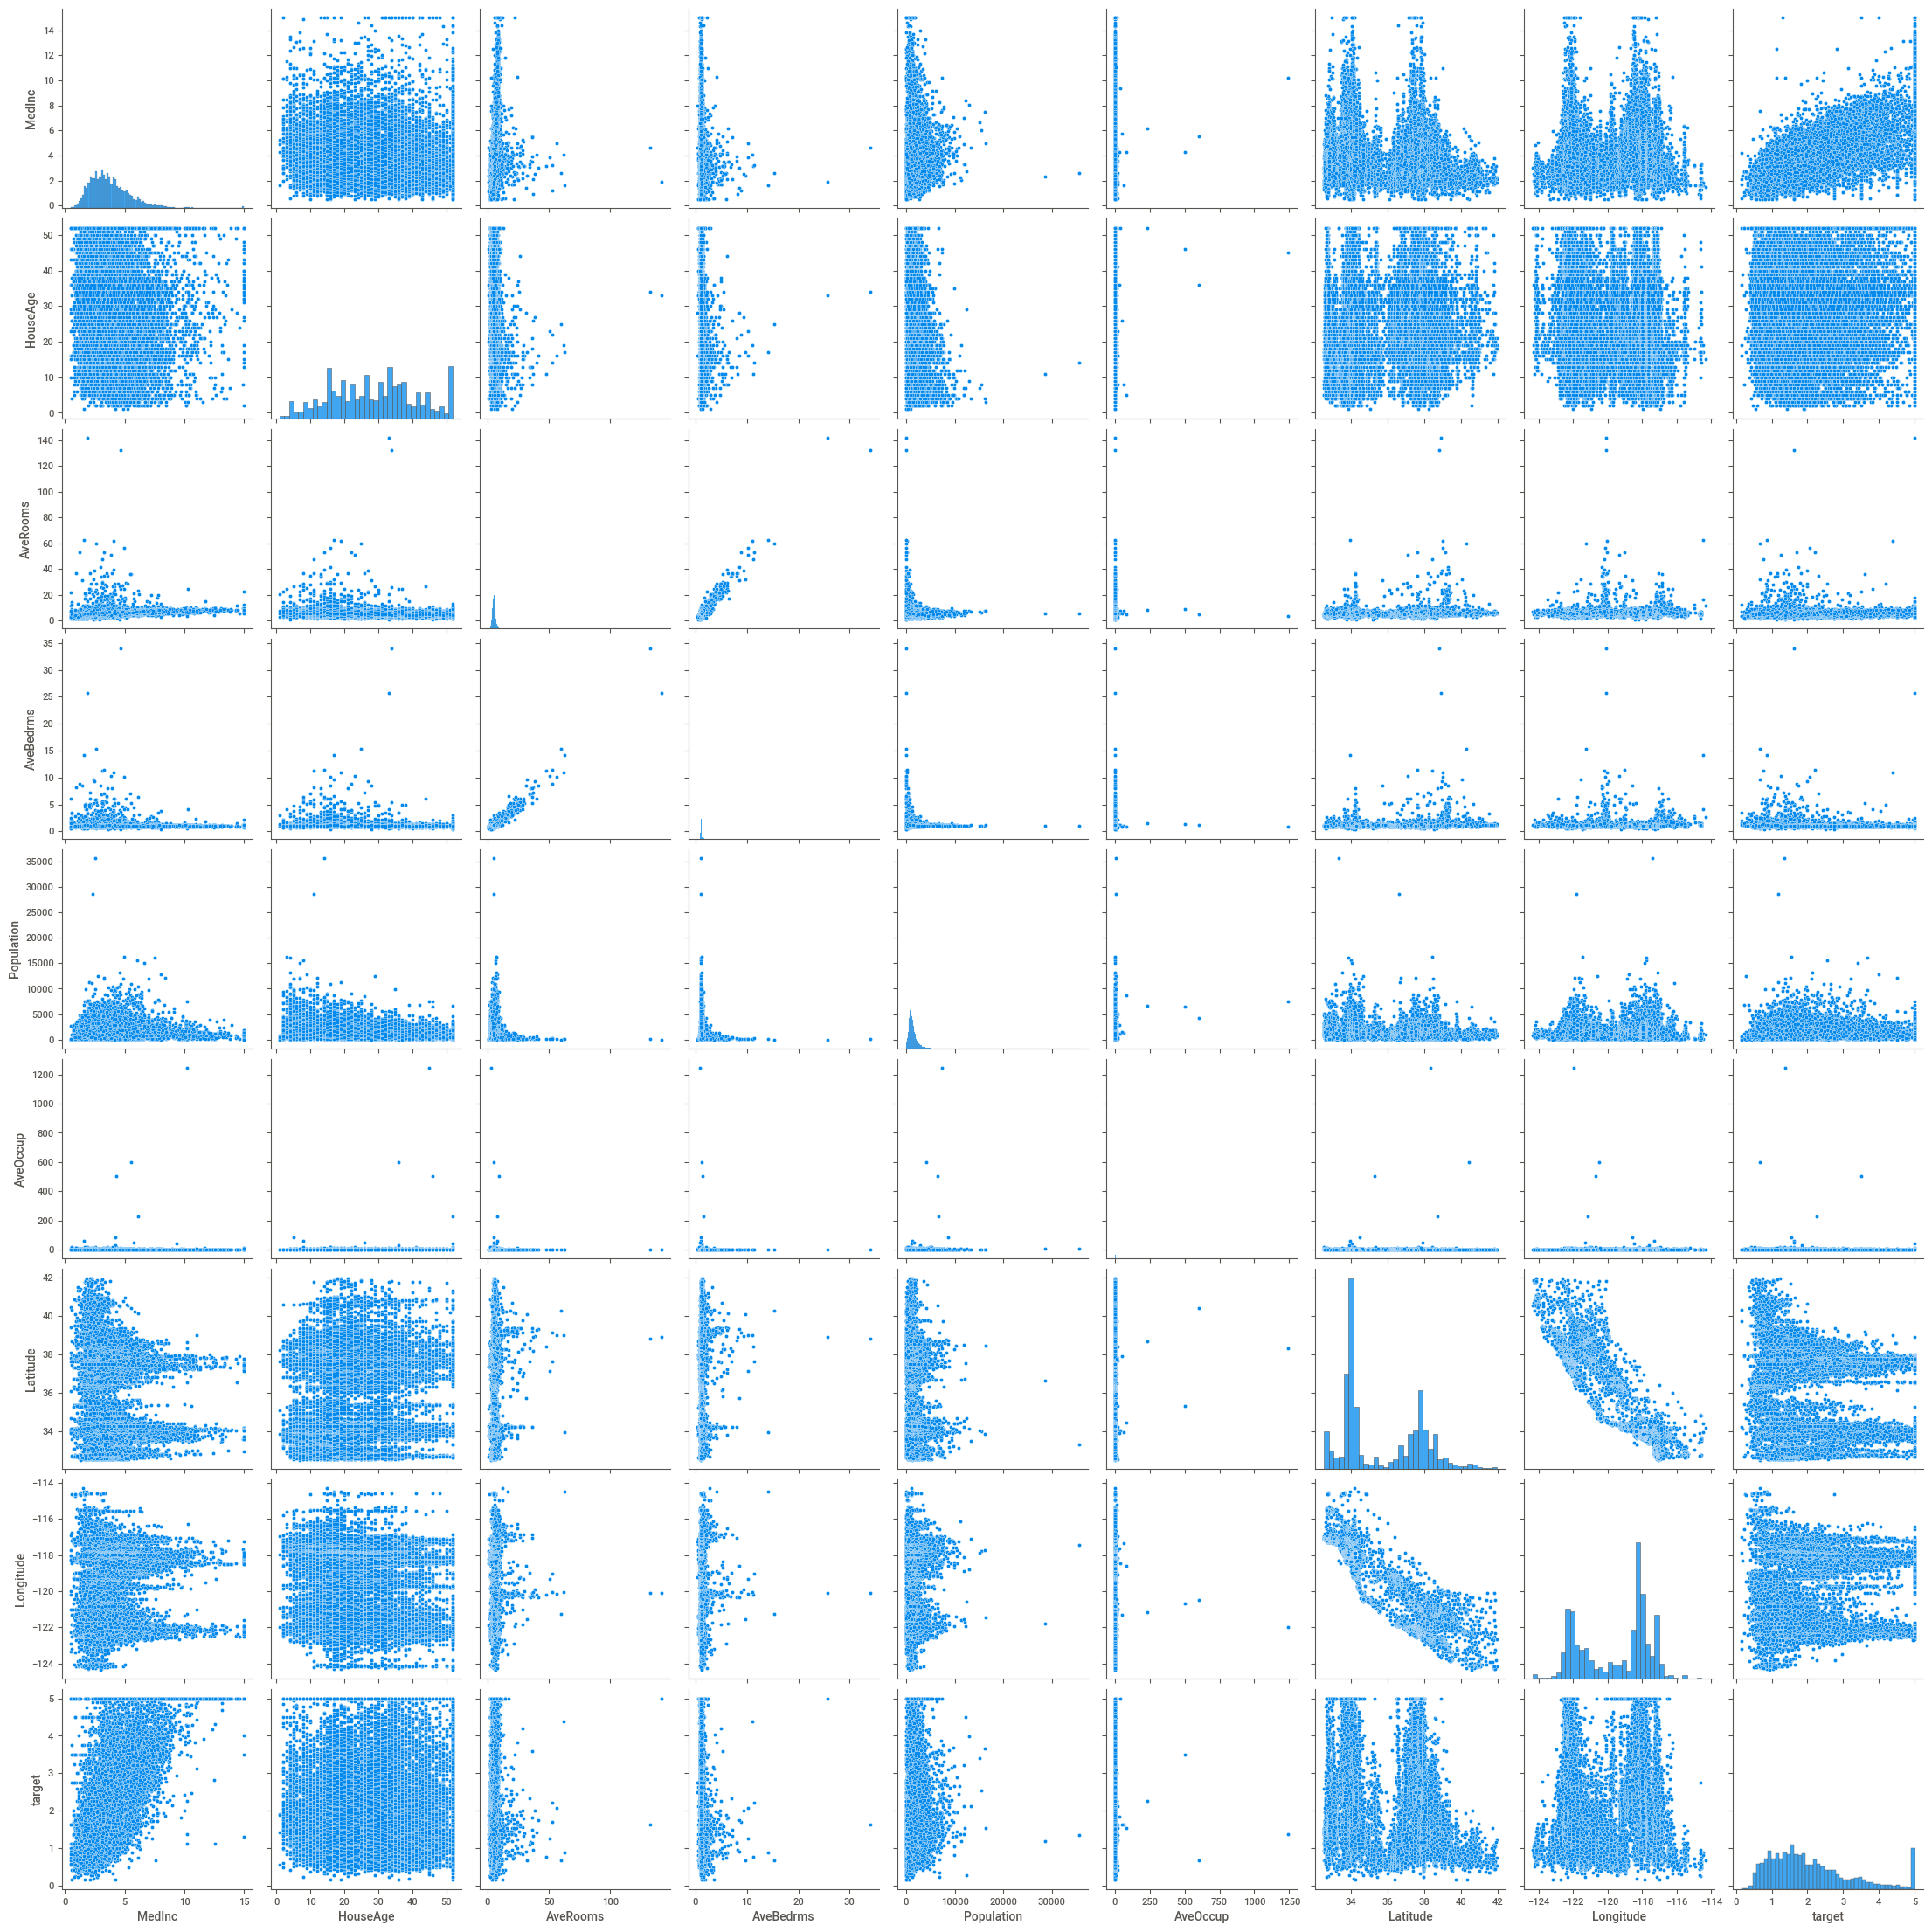

In [24]:
sns.pairplot(fch_df)

Text(0, 0.5, 'Price')

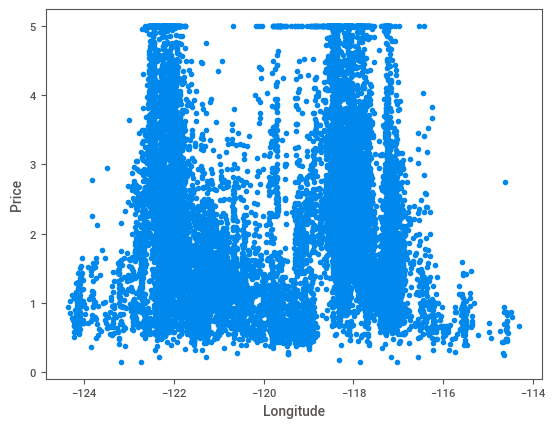

In [48]:
plt.scatter(fch_df['Longitude'],fch_df['Price'])
plt.xlabel('Longitude')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

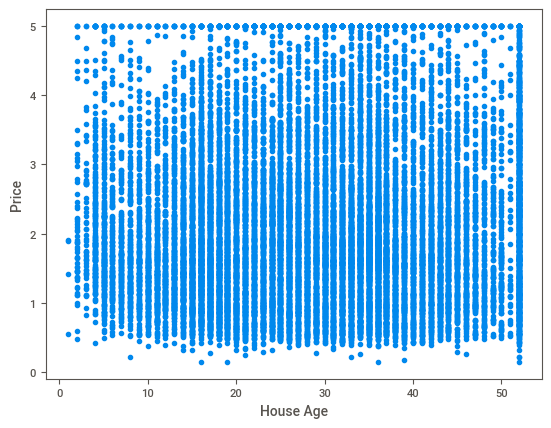

In [47]:
plt.scatter(fch_df['HouseAge'],fch_df['Price'])
plt.xlabel('House Age')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

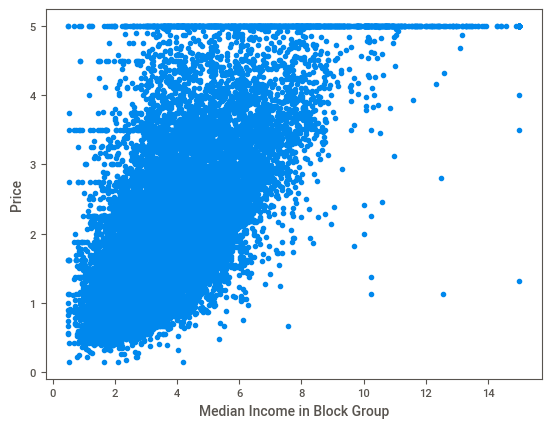

In [49]:
plt.scatter(fch_df['MedInc'],fch_df['Price'])
plt.xlabel('Median Income in Block Group')
plt.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='Price'>

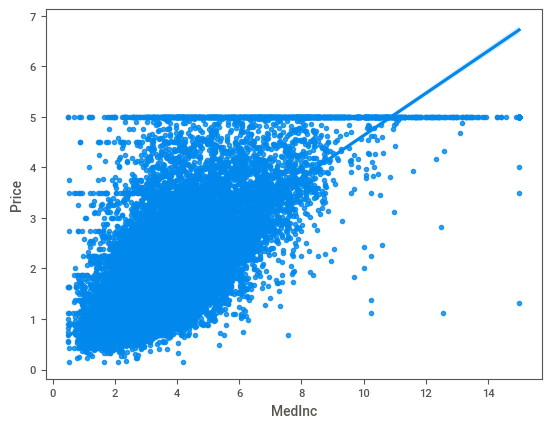

In [50]:
sns.regplot(x='MedInc',y='Price',data=fch_df)

<Axes: xlabel='AveRooms', ylabel='Price'>

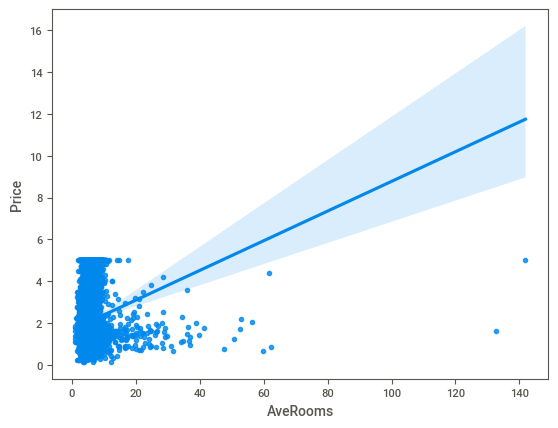

In [51]:
sns.regplot(x='AveRooms',y='Price',data=fch_df)

<Axes: xlabel='Longitude', ylabel='Price'>

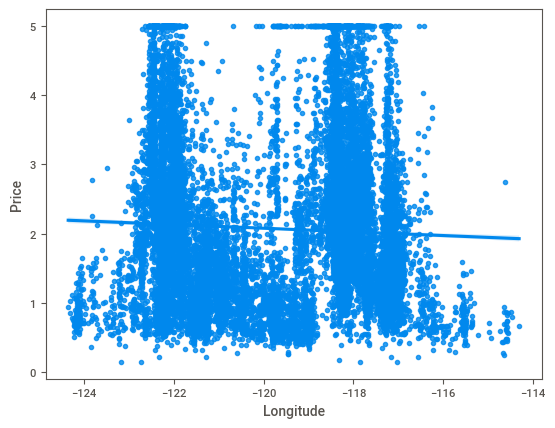

In [53]:
sns.regplot(x='Longitude',y='Price',data=fch_df)

<Axes: xlabel='HouseAge', ylabel='Price'>

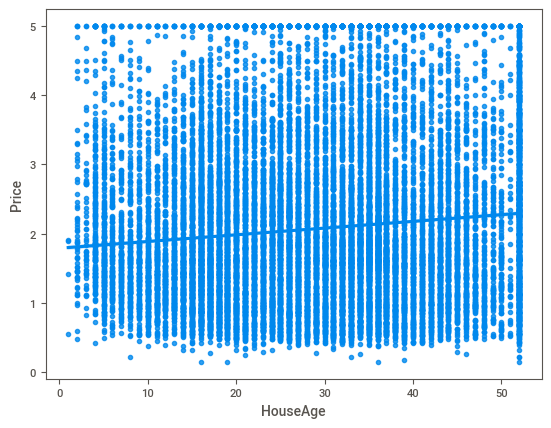

In [54]:
sns.regplot(x='HouseAge', y='Price',data=fch_df)

<Axes: xlabel='Population', ylabel='Price'>

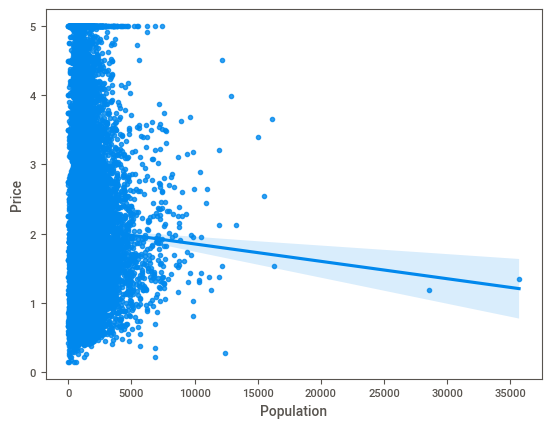

In [55]:
sns.regplot(x='Population',y='Price',data=fch_df)

Text(0.5, 1.0, 'Correlation Matrix')

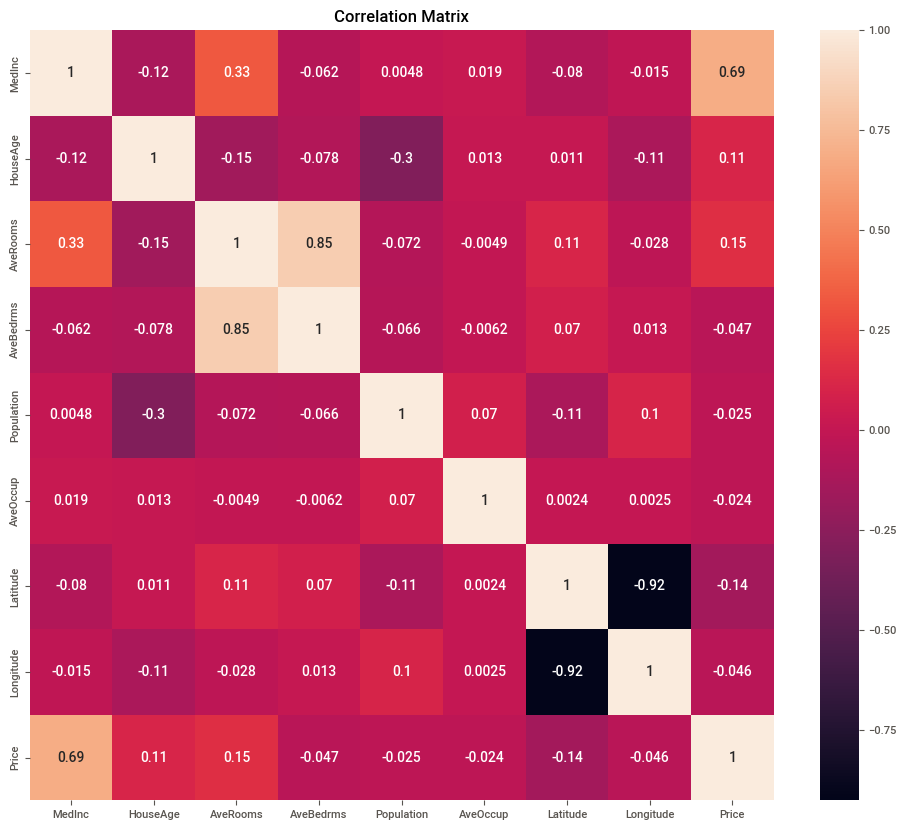

In [142]:
# Visualising the correlation matrix :
plt.figure(figsize=(12,10))
sns.heatmap(fch_df.corr(),annot=True)
plt.title('Correlation Matrix')

### Outliers Detection & Treatment

Text(0.5, 1.0, 'Outliers in Median Income')

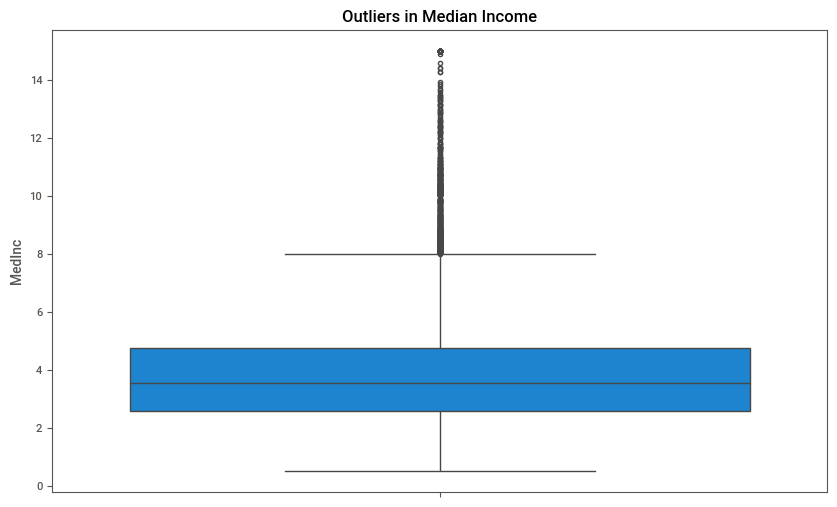

In [147]:
 plt.figure(figsize=(10,6))
sns.boxplot(fch_df['MedInc'])
plt.title("Outliers in Median Income")

In [149]:
# Remove the Outliers -
Q1 = fch_df['MedInc'].quantile(0.25)
Q3 = fch_df['MedInc'].quantile(0.75)
IQR = Q3 - Q1
fch_df = fch_df[~((fch_df['MedInc'] < (Q1 - 1.5 * IQR)) | (fch_df['MedInc'] > (Q3 + 1.5 * IQR)))]

## **Skewness Handling / Normalization-**

In [151]:
fch_df['MedInc'] = np.log1p(fch_df['MedInc'])
fch_df['Population'] = np.log1p(fch_df['Population'])

##**Feature Engineering-**

In [155]:
fch_df['Rooms_per_household'] = fch_df['AveRooms'] / fch_df['AveOccup']
fch_df['Bedrooms_per_room'] = fch_df['AveBedrms'] / fch_df['AveRooms']
fch_df['Population_per_household'] = fch_df['Population'] / fch_df['AveOccup']

print("\n New features created:")
display(fch_df[['Rooms_per_household', 'Bedrooms_per_room', 'Population_per_household']].head())


 New features created:


,Rooms_per_household,Bedrooms_per_room,Population_per_household
2,2.957661,0.129516,2.215565
3,2.283154,0.184458,2.482844
4,2.879646,0.172096,2.905656
5,2.225182,0.231774,2.815962
6,2.317185,0.192899,3.288148


##**Multicollinearity Check (VIF) -**


In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X already feature-engineered dataset
X_vif = x.copy()  # make copy to be safe

vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)


      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


### **Prepare Dataset for Model Training-**

In [56]:
# Dependent features & the independent features
x = fch_df.iloc[:,:-1]
y = fch_df.iloc[:,-1]

In [57]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [58]:
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [59]:
#  Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [61]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [62]:
y_train

,Price
14196,1.030
8267,3.821
17445,1.726
14265,0.934
2271,0.965
...,...
11284,2.292
11964,0.978
5390,2.221
860,2.835


In [63]:
y_test

,Price
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


### Standardize the dataset :  #A very important step

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [67]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [68]:
x_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [69]:
x_test

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

## **Model Training -**

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr=LinearRegression()

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
# print the coefficients & the intercept
print(lr.coef_)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [76]:
print(lr.intercept_)

2.0719469373788777


In [77]:
# On which parameters , the model has been trained
lr.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [79]:
# Prediction with Test Data:
pred_test=lr.predict(x_test)
pred_test

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

###Assumptions

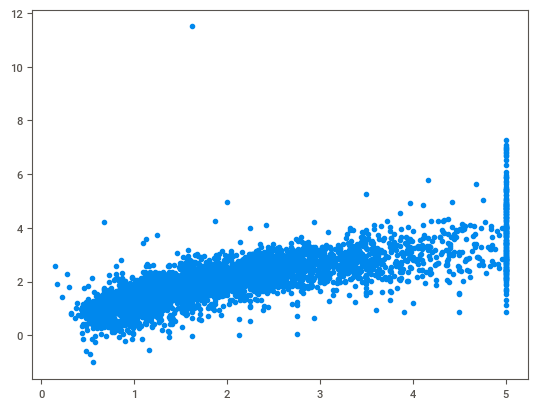

In [81]:
# plot a scatter plot for the prediction
plt.scatter(y_test,pred_test)

In [82]:
# Residuals
residuals=y_test-pred_test
residuals

,Price
20046,-0.242123
3024,-1.306017
15663,2.290351
20484,-0.652926
9814,0.175343
...,...
15362,0.641254
16623,0.418161
18086,0.531240
2144,-0.464511


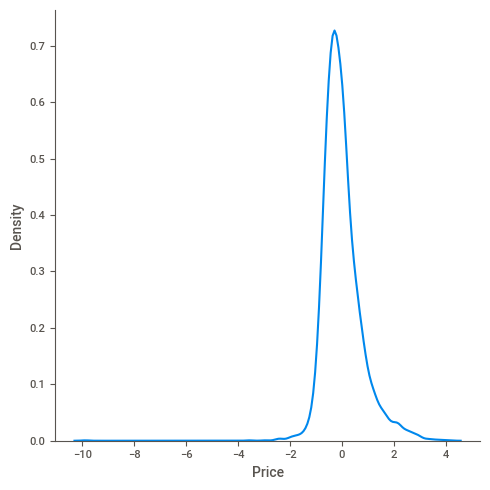

In [83]:
# plot this residuals :
sns.displot(residuals,kind='kde')

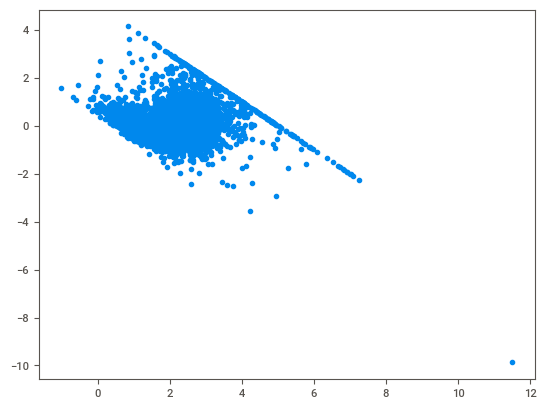

In [84]:
# Scatter plot with respect to prediction & residuals
# Uniform distribution
plt.scatter(pred_test,residuals)

##**Performance Metrics-**

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MAE :',mean_absolute_error(y_test,pred_test))
print('MSE :',mean_squared_error(y_test,pred_test))
print('RMSE :',np.sqrt(mean_squared_error(y_test,pred_test)))

MAE : 0.5332001304956565
MSE : 0.5558915986952442
RMSE : 0.7455813830127763


###R squared & Adjusted R-squared -

#### 1. R-Sqaured

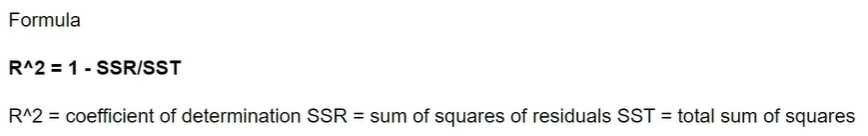

In [93]:
from IPython.display import Image
Image('/Formula of R^2.png')   # agar image 'images' folder me hai


In [94]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred_test)
print(score)

0.575787706032451


####2. Adjusted R-Squared

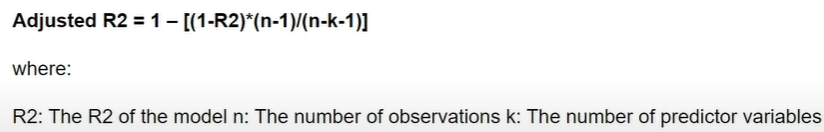

In [95]:
Image("/Adjusted R-Squared.png")

In [96]:
# display the adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.574963792861356

###**Actual vs Predicted Plot-**

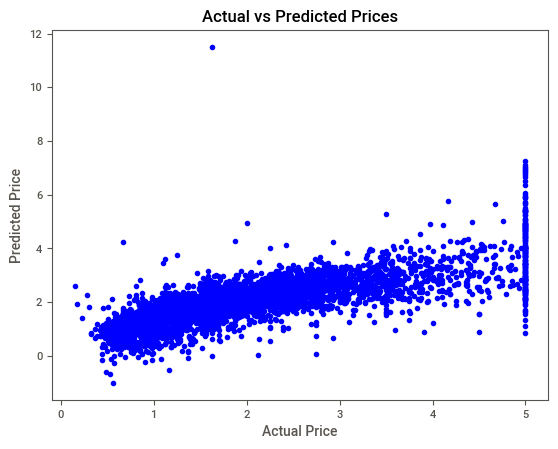

In [168]:
plt.scatter(y_test, pred_test, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

### **Cross Validation -**

In [164]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, x_train, y_train, cv=5, scoring='r2')
print("\n📊 Cross-Validation R² Scores:", cv_scores)
print("Average R²:", cv_scores.mean())


📊 Cross-Validation R² Scores: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Average R²: 0.6114839952560993


###**Random Forest Comparison**

In [172]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

r2_rf = r2_score(y_test, y_pred_rf)
print("\n Random Forest R² Score:", r2_rf)


 Random Forest R² Score: 0.8052747336256919


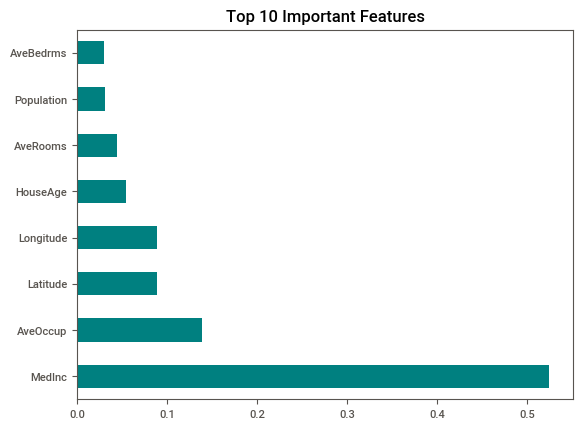

In [174]:
# Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.show()

##**Save Model for Deployment-**

In [177]:
import joblib
joblib.dump(rf, 'house_price_model.pkl')

['house_price_model.pkl']